# 4 多层感知机

## 4.1 多层感知机

在 [3.1 线性回归](3.ipynb) 中介绍了线性模型。一些情况下，可以通过简单的预处理使得线性合理，但是大部分时候无法成立。

因此考虑到通过在网络中加入一个或多个 **隐藏层** 来克服线性模型的限制，使其能处理更普遍的函数关系类型。

将许多全连接层堆叠在一起，每一层都输出到上面的层，直到生成最后的输出。共L层，把前L−1层看作表示，把最后一层看作线性预测器，这种架构通常称为 **多层感知机（multilayer perceptron）**，通常缩写为 **MLP** 。

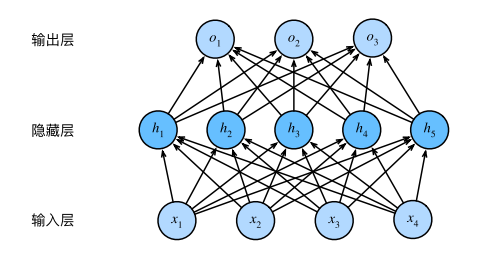

#### 隐藏层
隐藏层即是输出层和输入层之间不可见的那些层。


#### 非线性的实现
为了发挥多层架构的潜力，需要在仿射变换之后对每个隐藏单元应用 **非线性的** **激活函数（activation function）** ，一般记作 $\sigma$ 。激活函数的输出 $\sigma(\cdot)$ 被称为活性值。激活函数使得多层感知机不会退化成线性模型。

例如，单隐藏层的多层感知机：
$$\textbf{H}=\sigma(\textbf{XW}^{(1)}+\textbf{b}^{(1)})$$
$$\textbf{O}=\textbf{HW}^{(2)}+\textbf{b}^{(2)}$$

本质上是神经元学习近似，通过使用更深的网络能更容易地逼近许多函数。



#### 激活函数

激活函数的作用：
- 如上所讲，引入非线性。
- 决定神经元是否被激活，即是否产生有意义的的非零的输出信号传递给下一层。典型例子是ReLU函数，在 $z \leq 0$ 时不激活神经元。
- 影响梯度流动（反向传播），即其导数也参与到梯度流动过程中。

常见的激活函数：

1. **ReLU函数**：

    $$\text{ReLU}(x)=\max(x,0)$$

    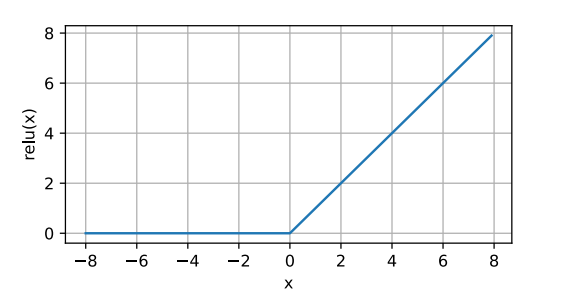

    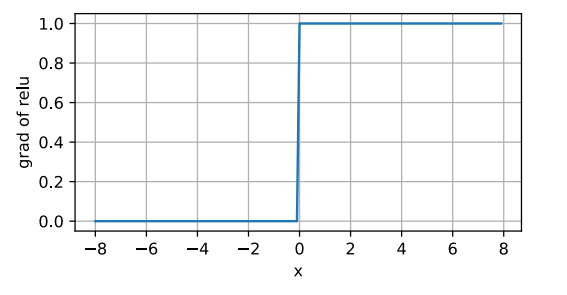

    实现简单，求导表现得特别好：要么让参数消失，要么让参数通过，使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题。

2. **sigmoid函数**：

    sigmoid通常称为挤压函数（squashing function），它将范围 $R$ 中的任意输入压缩到区间（0, 1）中的某个值：

    $$\text{sigmoid(x)}=\frac{1}{1+\exp(-x)}$$

    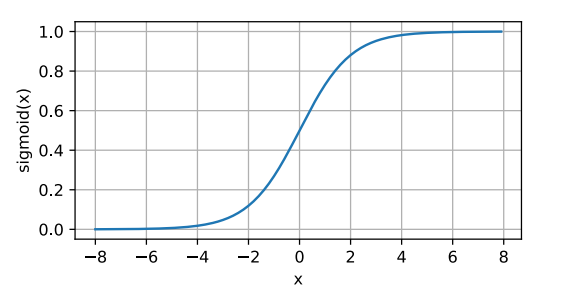

    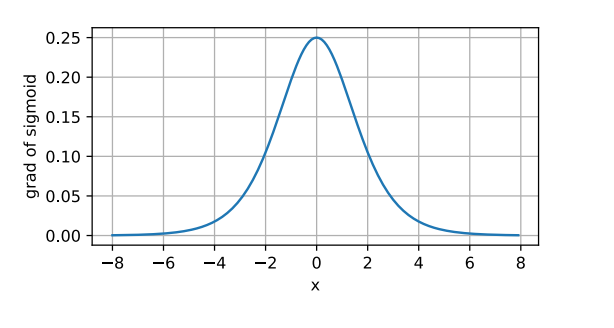

    sigmoid被广泛用作二元分类问题输出单元上的激活函数，可以视为softmax的特例。

3. **tanh函数**：

    与sigmoid函数类似，tanh(双曲正切)函数也能将其输入压缩转换到区间(‐1, 1)上：

    $$\text{tanh}(x)=\frac{1-\exp(-2x)}{1+\exp(-2x)}$$

    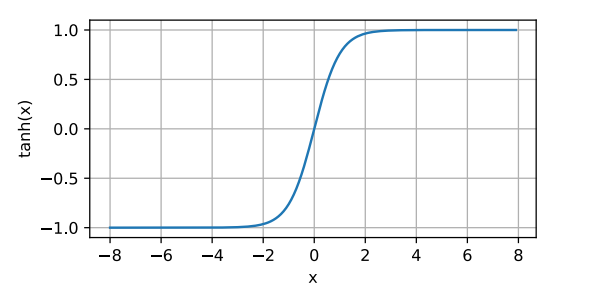

    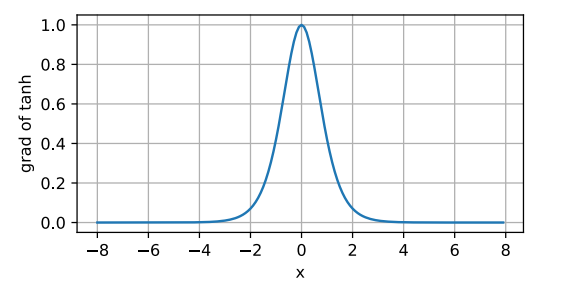

    

## 4.2 模型选择

**欠拟合（underfitting）** ：机器学习模型过于简单，无法捕捉训练数据中的基本模式和规律，表现为模型在训练集和验证集上的误差都很严重。

**过拟合（overfitting）** ：将模型在训练数据上拟合的比在潜在分布中更接近的现象。

**正则化（regularization）** ：用于对抗过拟合的技术。在模型训练过程中， **对模型的复杂度施加惩罚** 。通过向模型的损失函数添加一个额外的“惩罚项”，鼓励模型学习更简单、更平滑的模式，而不是去死记硬背训练数据。

**训练误差（training error）** ：模型在训练数据集上计算得到的误差。

**泛化误差（generalization error）** ：模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。将模型应用于一个独立的测试集来估计泛化误差。

**早停（early stopping）** ：在模型训练过程中， **持续监控模型在验证集上的性能** 。一旦发现验证集性能不再提升甚至开始下降（表明模型开始过拟合训练集），就 **提前终止训练过程** 。

**验证集（validation set）** ：
- 模型调优：用于在训练过程中调整模型的超参数
- 监控训练过程：用于检测过拟合，在每个训练周期结束后评估验证集上的性能，如损失、准确率，并与训练集性能对比
- 模型选择：在机器学习中，我们通常在评估几个候选模型后选择最终的模型。验证集能够比较不同模型的性能，选择表现最好的


*注：当训练数据稀缺时，可以采用 **K折交叉验证** 。原始训练数据被分成K个不重叠的子集，然后执行K次模型训练和验证，每次在K-1个子集上进行训练，并在剩余的一个子集上进行验证。*


**测试集（test set）** ：
在模型训练和调优完全结束后，对模型的最终泛化能力进行无偏估计，是从原始数据中 **独立划分** 出来的、在整个训练和调优过程中 **从未被模型或其训练过程见过** 的数据。

## 4.3 权重衰减

**权重衰减（weight decay）** 是最广泛使用的正则化的技术之一，它通常也被称为 $L_2$ 正则化。

一种简单的方法是通过线性函数 $f(\textbf{x})=\textbf{w}^T \textbf{x}$ 中的权重向量的某个范数来度量其复杂性，例如 $||\textbf{w}||^2$ 。要保证权重向量比较小，最常用方法是将其范数作为惩罚项加到最小化损失的问题中。将原来的训练目标最小化训练标签上的预测损失，调整为最小化预测损失和惩罚项之和。现在，如果我们的权重向量增长的太大，我们的学习算法可能会更集中于最小化权重范数 $||\textbf{w}||^2$ 。

原损失函数：
$$L(\textbf{w}, b)=\frac{1}{n}\sum_{i=1}^n \frac{1}{2}(\textbf{w}^T x^{(i)}+b-y^{(i)})^2$$
加入 $L_2$ 正则化的损失函数：
$$L(\textbf{w}, b)+\frac{\lambda}{2}||\textbf{w}||^2$$
$L_2$ 正则化回归的小批量随机梯度梯度下降：
$$\textbf{w} \leftarrow (1-\eta\lambda)\textbf{w} - \frac{\eta}{\mathcal{B}} \sum_{i\in \mathcal{B}}\textbf{x}^{(i)}(\textbf{w}^T\textbf{x}^{(i)}+b-y^{(i)})$$

## 4.4 暂退法

神经网络具有较好的泛化性，应该对其输入的微小变化不敏感，即加入随机噪声应该是基本无影响的。

**暂退法（dropout）** ：

在前向传播过程中，计算每一内部层的同时注入噪声。噪声是 **无偏向（unbiased）** 的，对于每一层按照设置的暂退概率 $p$ 进行 **丢弃（dropout）** 神经元（ $h$ 是中间活性值， $h'$ 是替换后的活性值）：

$$h' = \begin{cases}0 & \text{概率}p \\ \frac{h}{1-p} & \text{概率}1-p\end{cases}$$

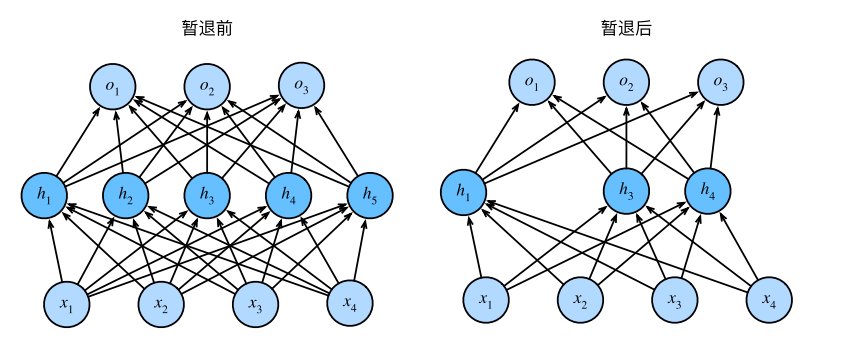

这样每个神经元的期望值不变（无偏性），即 $E[h']=h$ ，但是如上图，暂退后删除了结点 $h_2$ 和 $h_5$ ，事实上每个中间层的节点都有可能删除，因此输出层的计算不能过度依赖于中间层 $h_1,...,h_5$ 结点的任意元素。

单层的暂退法函数如下：

In [4]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1 
    # 在Python中，断言语句用于调试程序，确保某个条件为真。如果条件为假，程序将抛出一个AssertionError异常。

    if dropout == 0:    # 暂退概率为0，则不进行暂退
        return X
    elif dropout == 1:
        return torch.zeros_like(X) # 暂退概率为1，则全部神经元暂退
    else:
        mask = (torch.rand(X.shape) > dropout).float()
        # torch.rand()生成在区间[0,1)之间的随机张量，因此mask中大约有dropout比例的元素为0，其余为1
        return mask * X / (1 - dropout)
    


AttributeError: 'RcParams' object has no attribute '_get'

## 4.5 前向传播、反向传播

**前向传播（forward propagation或forward pass）** ：按顺序（从输入层到输出层）计算和存储神经网络中每层的结果。

**反向传播（backward propagation或backpropagation）** ：计算神经网络参数梯度，根据微积分中的链式规则，按相反的顺序从输出层到输入层遍历网络。

在训练神经网络时，在初始化模型参数后，我们交替使用前向传播和反向传播，利用反向传播给出的梯度来更新模型参数。注意，反向传播重复利用前向传播中存储的中间值，以避免重复计算。

## 4.6 梯度消失、梯度爆炸、参数初始化

考虑一个具有 $L$ 层、输入 $\textbf{x}$ 和输出 $\textbf{o}$ 的深层网络。 $\textbf{o}$ 关于任何一组参数 $\textbf{W}^{(l)}$ 的梯度是多个中间变量偏导矩阵与第 $l$ 层中间变量 $h$ 关于 $W^{(l)}$ 的乘积。当将它们相乘，数值可能会上下溢，带来不稳定梯度。

#### 梯度消失

**梯度消失（gradient vanishing）** ：

sigmend函数的输入很大或很小时，梯度都会消失。

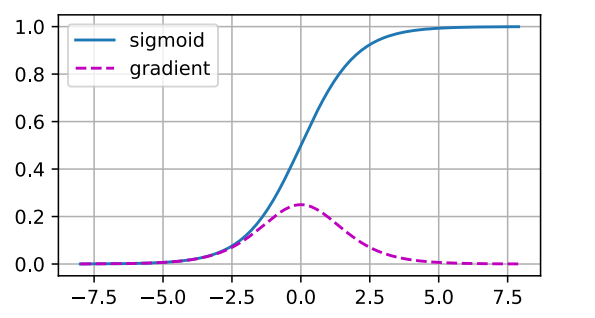

#### 梯度爆炸

**梯度爆炸（gradient exploding）** ：

矩阵乘积发生爆炸。

#### 参数初始化

解决（或至少减轻）上述问题的一种方法是进行参数初始化，优化期间的注意和适当的正则化也可以进一步提高稳定性。

**Xavier初始化** ：
- 目标：在前向传播和反向传播中，保持每一层的输入和输出的方差大致相同，避免信号在深层网络中过度放大或衰减
- 假设：
    - 激活函数是线性或近似线性的
    - 权重初始化为均值为0的对称分布，如均匀分布或正态分布


## 4.7 分布偏移

训练数据和测试数据分布不同下，如果二者没有任何相互关系，则训练出的模型无法应用；如果二者只是简单地以任意方式偏移，则一些算法可以检测这种偏移，甚至可以动态调整，提高原始分类器的精度。

将数据看做 $(\textbf{x}, y)$ 的多维随机变量：

#### 协变量偏移

**协变量偏移（covariate shift）** 表明虽然数据的分布可能改变，但标签函数（即条件分布 $P(y|\textbf{x})$ ）没有改变。

例如训练区分猫和狗的模型，根据真实图像进行训练，但是使用卡通图片进行测试。图片特征导致区分是猫还是狗，因此虽然数据发生变化，但是特征 $\textbf{x}$ 和 $y$ 的关系不变。

---

在不考虑正则化的情况下，基于损失函数 $l$ 的整个训练数据上的平均损失定义为：
$$ E_{p(\textbf{x},y)}[l(f(\textbf{x}, y))] = \iint l(f(\textbf{x}), y)p(\textbf{x}, y) \text{d}\textbf{x}\text{d}y $$

对于训练数据，特征分布为 $q(\textbf{x})$ ；对于测试数据，特征分布为 $p(\textbf{x})$ 。二者分布即使不同，也存在恒等式：
$$ \iint l(f(\textbf{x}), y)p(y | \textbf{x})p(\textbf{x}) \text{d}\textbf{x}\text{d}y = \iint l(f(\textbf{x}), y)q(y | \textbf{x})q(\textbf{x})\frac{p(\textbf{x})}{q(\textbf{x})}\text{d}\textbf{x}\text{d}y$$

因此引入每个数据样本的权重：
$$ \beta_i = \frac{p(\textbf{x}_i)}{q(\textbf{x}_i)} $$

使用新的损失函数进行训练：
$$ \min_f \frac{1}{n} \sum_{i=1}^{n} \beta_i l(f(\textbf{x}_i), y_i) $$

---

$ \beta $ 需要使用一些方法进行估计。常用的有 **对数几率回归方法** 。（该方法暂不作学习）

#### 标签偏移

**标签偏移（label shift）** 描述了与协变量偏移相反的问题。假设标签边缘概率 $P(y)$ 可以改变，但是类别条件分布 $P(\textbf{x}|y)$ 保持不变。

例如预测患者的疾病，模型根据症状来判断疾病，而疾病导致症状。因此虽然标签（即疾病）的概率可能随着地区等不同，但是疾病导致症状， $y$ 导致 $\textbf{x}$ 的关系不变。

#### 概念偏移

**概念偏移（concept shift）** 表明标签的定义可能发生变化。